# Задание 1. Введение в QEPM (Quantitative Equity Portfolio Management)
> выполнил Литвинов А. А., гр. МФИН211

### В данном задании используются данные по фундаментальным показателям американских компаний. Исходные данные взяты с сайта http://simfin.com.

## 1. Загрузка библиотек

In [1]:
import numpy as np #  библиотека numpy
import pandas as pd # библиотека panadas
from __future__ import division # отображение результатов деления
from pandas_datareader import data # библиотека загрузка данных из интернета
import matplotlib.pyplot as plt # графическая библиотека
%matplotlib inline

## 2. Загрузка данных

In [2]:
path='.\\ap_data\\'

In [46]:
comp=pd.read_csv(path+'indicators_file_yahoo.csv')
comp = comp.drop(comp[comp.Ticker == 'RTN'].index)
# массив данных с фундаментальными показателями

In [47]:
comp.head()

,Ticker,Name,Sector,Industry,MarketCap,EPS,PE,PS,BookMarket,DivRatio
0,DDD,3D Systems Corporation,Technology,Computer Software: Prepackaged Software,2.045077e+09,-0.46,-26.52,2.00,0.42,0.00
1,MMM,3M Company,Health Care,Medical/Dental Instruments,1.233179e+11,7.64,25.57,3.53,0.09,5.24
2,EGHT,8x8 Inc,Technology,EDP Services,1.816977e+09,-1.47,-11.86,6.35,0.14,0.00
3,AHC,A.H. Belo Corporation,Consumer Services,Newspapers/Magazines,9.687409e+07,0.33,13.41,0.45,NaN,0.47
4,AOS,A.O Smith Corporation,Consumer Durables,Consumer Electronics/Appliances,1.363486e+09,1.99,22.99,2.49,1.47,0.68


In [48]:
comp.shape # размер массива

(1517, 10)

In [49]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1517
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ticker      1517 non-null   object 
 1   Name        1517 non-null   object 
 2   Sector      1514 non-null   object 
 3   Industry    1514 non-null   object 
 4   MarketCap   1369 non-null   float64
 5   EPS         1314 non-null   float64
 6   PE          1314 non-null   float64
 7   PS          1314 non-null   float64
 8   BookMarket  1383 non-null   float64
 9   DivRatio    1332 non-null   float64
dtypes: float64(6), object(4)
memory usage: 130.4+ KB


In [140]:
comp[comp.Ticker=='BA']

,Ticker,Name,Sector,Industry,MarketCap,EPS,PE,PS,BookMarket,DivRatio
118,BA,Boeing Company (The),Capital Goods,Aerospace,2.220302e+11,17.41,21.37,2.22,-0.01,6.51


In [50]:
comp.Sector.unique()

array(['Technology', 'Health Care', 'Consumer Services',
       'Consumer Durables', 'Capital Goods', 'Finance', 'Miscellaneous',
       'Basic Industries', 'Transportation', 'Public Utilities',
       'Consumer Non-Durables', 'Energy', nan], dtype=object)

In [51]:
comp[comp.Sector=='Energy'].shape

(75, 10)

In [52]:
comp.groupby('Sector').sum(numeric_only=True).sort_values(by='MarketCap')[::-1]

,MarketCap,EPS,PE,PS,BookMarket,DivRatio
Sector,,,,,,
Technology,6.380668e+12,329.83,145.01,967.26,80.10,97.38
Consumer Services,4.489984e+12,-2383.06,-10963.85,569.12,127.79,284.30
Health Care,3.808939e+12,176.70,6939.99,7364.74,73.75,70.88
Finance,3.392137e+12,641.27,1181.14,373.92,111.52,201.58
Capital Goods,1.840858e+12,447.28,2541.25,407.89,83.30,107.54
Energy,1.694736e+12,125.88,717.66,108.05,56.71,53.34
Public Utilities,1.577849e+12,107.90,-141.20,110.85,29.07,89.85
Consumer Non-Durables,1.547600e+12,223.41,1084.55,144.10,38.19,92.10
Miscellaneous,1.043345e+12,114.61,2343.81,201.69,55.37,19.97


### Сформируем выборку из 20 крупнейших компаний по показателю капитализации, 10 компаний из сектора *Health Care* и 10 компаний из сектора *Capital Goods*

In [53]:
index_l_healthcare=list(comp[comp.Sector=='Health Care'].dropna().MarketCap.nlargest(10).index)  
# индексы (номера) наблюдений для 10 крупнейших энергетических компаний

In [54]:
comp.loc[index_l_healthcare,:]

,Ticker,Name,Sector,Industry,MarketCap,EPS,PE,PS,BookMarket,DivRatio
412,JNJ,Johnson & Johnson,Health Care,Major Pharmaceuticals,3.730871e+11,0.57,254.03,4.81,0.17,3.48
561,PFE,"Pfizer, Inc.",Health Care,Major Pharmaceuticals,2.648686e+11,4.03,10.81,4.82,0.28,1.34
738,UNH,UnitedHealth Group Incorporated,Health Care,Medical Specialities,2.586962e+11,13.02,20.09,1.15,0.22,3.30
480,MRK,"Merck & Company, Inc.",Health Care,Major Pharmaceuticals,1.922491e+11,1.24,60.00,4.81,0.17,1.93
8,ABBV,AbbVie Inc.,Health Care,Major Pharmaceuticals,1.435682e+11,4.83,17.72,4.17,-0.02,3.29
859,AMGN,Amgen Inc.,Health Care,Biotechnology: Biological Products (No Diagnos...,1.330597e+11,3.22,59.91,5.66,0.12,5.13
7,ABT,Abbott Laboratories,Health Care,Major Pharmaceuticals,1.255742e+11,0.50,139.75,4.07,0.25,1.11
264,LLY,Eli Lilly and Company,Health Care,Major Pharmaceuticals,1.248462e+11,0.43,243.69,4.52,0.13,2.21
1,MMM,3M Company,Health Care,Medical/Dental Instruments,1.233179e+11,7.64,25.57,3.53,0.09,5.24
131,BMY,Bristol-Myers Squibb Company,Health Care,Major Pharmaceuticals,1.026451e+11,0.88,57.82,3.76,0.17,1.59


In [55]:
index_l_capitalgoods=list(comp[comp.Sector=='Capital Goods'].dropna().MarketCap.nlargest(10).index)
# индексы (номера) наблюдений для 10 крупнейших  компаний сектора IT

In [56]:
comp.loc[index_l_capitalgoods,:]

,Ticker,Name,Sector,Industry,MarketCap,EPS,PE,PS,BookMarket,DivRatio
118,BA,Boeing Company (The),Capital Goods,Aerospace,2.220302e+11,17.41,21.37,2.22,-0.01,6.51
379,HON,Honeywell International Inc.,Capital Goods,Auto Parts:O.E.M.,1.218384e+11,3.44,42.77,2.63,0.17,2.92
450,LMT,Lockheed Martin Corporation,Capital Goods,Military/Government/Technical,9.965344e+10,10.92,28.25,1.62,0.01,8.06
697,TMO,Thermo Fisher Scientific Inc,Capital Goods,Industrial Machinery/Components,9.642080e+10,6.39,36.48,3.92,0.29,0.64
160,CAT,"Caterpillar, Inc.",Capital Goods,Construction/Ag Equipment/Trucks,9.168872e+10,6.38,19.17,1.37,0.22,3.20
224,DHR,Danaher Corporation,Capital Goods,Industrial Machinery/Components,7.390111e+10,3.95,25.65,3.61,0.39,0.60
324,GD,General Dynamics Corporation,Capital Goods,Marine Transportation,6.128394e+10,10.37,17.80,1.60,0.25,3.55
521,NOC,Northrop Grumman Corporation,Capital Goods,Industrial Machinery/Components,5.577870e+10,15.72,18.07,1.75,0.19,4.53
1134,ILMN,"Illumina, Inc.",Capital Goods,Biotechnology: Laboratory Analytical Instruments,5.286120e+10,4.66,66.76,14.08,0.08,0.00
227,DE,Deere & Company,Capital Goods,Industrial Machinery/Components,4.988145e+10,7.34,20.33,1.29,0.24,2.50


In [57]:
sample=comp.loc[index_l_capitalgoods+index_l_healthcare,:]
sample.head()
# формирование выборки

,Ticker,Name,Sector,Industry,MarketCap,EPS,PE,PS,BookMarket,DivRatio
118,BA,Boeing Company (The),Capital Goods,Aerospace,2.220302e+11,17.41,21.37,2.22,-0.01,6.51
379,HON,Honeywell International Inc.,Capital Goods,Auto Parts:O.E.M.,1.218384e+11,3.44,42.77,2.63,0.17,2.92
450,LMT,Lockheed Martin Corporation,Capital Goods,Military/Government/Technical,9.965344e+10,10.92,28.25,1.62,0.01,8.06
697,TMO,Thermo Fisher Scientific Inc,Capital Goods,Industrial Machinery/Components,9.642080e+10,6.39,36.48,3.92,0.29,0.64
160,CAT,"Caterpillar, Inc.",Capital Goods,Construction/Ag Equipment/Trucks,9.168872e+10,6.38,19.17,1.37,0.22,3.20


In [58]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 118 to 131
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ticker      20 non-null     object 
 1   Name        20 non-null     object 
 2   Sector      20 non-null     object 
 3   Industry    20 non-null     object 
 4   MarketCap   20 non-null     float64
 5   EPS         20 non-null     float64
 6   PE          20 non-null     float64
 7   PS          20 non-null     float64
 8   BookMarket  20 non-null     float64
 9   DivRatio    20 non-null     float64
dtypes: float64(6), object(4)
memory usage: 1.7+ KB


In [59]:
sample.Ticker.values

array(['BA', 'HON', 'LMT', 'TMO', 'CAT', 'DHR', 'GD', 'NOC', 'ILMN', 'DE',
       'JNJ', 'PFE', 'UNH', 'MRK', 'ABBV', 'AMGN', 'ABT', 'LLY', 'MMM',
       'BMY'], dtype=object)

## 4. Загрузка дневных котировок по отобранным компаниям с сервера Yahoo Finance

In [62]:
sample_tickers=list(sample.Ticker)
# выбор тикеров для загрузки с сервера Yahoo finance

df = data.DataReader(sample_tickers,
                    start='2017-12-29',
                    end='2018-12-31',
                    data_source='yahoo')['Close']
# загрузка дневных котировок

In [63]:
df.shape

(252, 20)

In [64]:
df.head()

Symbols,BA,HON,LMT,TMO,CAT,DHR,GD,NOC,ILMN,DE,JNJ,PFE,UNH,MRK,ABBV,AMGN,ABT,LLY,MMM,BMY
Date,,,,,,,,,,,,,,,,,,,,
2017-12-29,294.910004,146.987793,321.049988,189.880005,157.580002,92.820000,203.449997,306.910004,218.490005,156.509995,139.720001,34.364326,220.460007,53.692749,96.709999,173.899994,57.070000,84.459999,235.369995,61.279999
2018-01-02,296.839996,147.323242,318.540009,192.979996,157.039993,92.440002,200.490005,305.239990,224.029999,158.009995,139.229996,34.573055,221.160004,53.645039,98.410004,177.000000,58.790001,84.680000,235.639999,61.310001
2018-01-03,297.799988,146.106018,321.209991,196.520004,157.279999,93.669998,201.740005,306.649994,230.320007,158.729996,140.559998,34.829224,223.479996,53.568703,99.949997,180.339996,58.919998,85.139999,235.630005,61.360001
2018-01-04,296.670013,148.080414,326.720001,198.979996,159.440002,94.120003,205.210007,308.549988,232.990005,159.639999,140.550003,34.905125,224.449997,54.437023,99.379997,179.580002,58.820000,85.519997,238.710007,61.750000
2018-01-05,308.839996,149.115540,329.679993,202.389999,161.960007,94.709999,204.699997,308.220001,228.169998,160.320007,141.710007,34.971539,228.729996,54.379772,101.110001,180.649994,58.990002,86.570000,240.570007,61.889999


In [66]:
df.to_csv(path+'Ex_strat_1_HW.csv') # сохранение массива в файле формата csv

### Загрзуку данных из интернета следует реализовать один раз. При последующей отладке вышеприведенные команды следует "закомментарить"

In [67]:
prices=pd.read_csv(path+'Ex_strat_1_HW.csv',index_col='Date',parse_dates=True)[:'2018-12-31'] # выгрузка массива из файла

In [68]:
prices.head()

,BA,HON,LMT,TMO,CAT,DHR,GD,NOC,ILMN,DE,JNJ,PFE,UNH,MRK,ABBV,AMGN,ABT,LLY,MMM,BMY
Date,,,,,,,,,,,,,,,,,,,,
2017-12-29,294.910004,146.987793,321.049988,189.880005,157.580002,92.820000,203.449997,306.910004,218.490005,156.509995,139.720001,34.364326,220.460007,53.692749,96.709999,173.899994,57.070000,84.459999,235.369995,61.279999
2018-01-02,296.839996,147.323242,318.540009,192.979996,157.039993,92.440002,200.490005,305.239990,224.029999,158.009995,139.229996,34.573055,221.160004,53.645039,98.410004,177.000000,58.790001,84.680000,235.639999,61.310001
2018-01-03,297.799988,146.106018,321.209991,196.520004,157.279999,93.669998,201.740005,306.649994,230.320007,158.729996,140.559998,34.829224,223.479996,53.568703,99.949997,180.339996,58.919998,85.139999,235.630005,61.360001
2018-01-04,296.670013,148.080414,326.720001,198.979996,159.440002,94.120003,205.210007,308.549988,232.990005,159.639999,140.550003,34.905125,224.449997,54.437023,99.379997,179.580002,58.820000,85.519997,238.710007,61.750000
2018-01-05,308.839996,149.115540,329.679993,202.389999,161.960007,94.709999,204.699997,308.220001,228.169998,160.320007,141.710007,34.971539,228.729996,54.379772,101.110001,180.649994,58.990002,86.570000,240.570007,61.889999


In [69]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-12-29 to 2018-12-31
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BA      252 non-null    float64
 1   HON     252 non-null    float64
 2   LMT     252 non-null    float64
 3   TMO     252 non-null    float64
 4   CAT     252 non-null    float64
 5   DHR     252 non-null    float64
 6   GD      252 non-null    float64
 7   NOC     252 non-null    float64
 8   ILMN    252 non-null    float64
 9   DE      252 non-null    float64
 10  JNJ     252 non-null    float64
 11  PFE     252 non-null    float64
 12  UNH     252 non-null    float64
 13  MRK     252 non-null    float64
 14  ABBV    252 non-null    float64
 15  AMGN    252 non-null    float64
 16  ABT     252 non-null    float64
 17  LLY     252 non-null    float64
 18  MMM     252 non-null    float64
 19  BMY     252 non-null    float64
dtypes: float64(20)
memory usage: 41.3 KB


In [70]:
prices.index

DatetimeIndex(['2017-12-29', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

## 5. Расчет доходностей для различных периодов времени

In [74]:
returns=prices.copy()
returns=returns.pct_change().iloc[1:,:] # дневная доходность
returns.head()

,BA,HON,LMT,TMO,CAT,DHR,GD,NOC,ILMN,DE,JNJ,PFE,UNH,MRK,ABBV,AMGN,ABT,LLY,MMM,BMY
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.006544,0.002282,-0.007818,0.016326,-0.003427,-0.004094,-0.014549,-0.005441,0.025356,0.009584,-0.003507,0.006074,0.003175,-0.000889,0.017578,0.017826,0.030138,0.002605,0.001147,0.000490
2018-01-03,0.003234,-0.008262,0.008382,0.018344,0.001528,0.013306,0.006235,0.004619,0.028077,0.004557,0.009553,0.007409,0.010490,-0.001423,0.015649,0.018870,0.002211,0.005432,-0.000042,0.000816
2018-01-04,-0.003794,0.013513,0.017154,0.012518,0.013733,0.004804,0.017200,0.006196,0.011593,0.005733,-0.000071,0.002179,0.004340,0.016209,-0.005703,-0.004214,-0.001697,0.004463,0.013071,0.006356
2018-01-05,0.041022,0.006990,0.009060,0.017137,0.015805,0.006269,-0.002485,-0.001069,-0.020688,0.004260,0.008253,0.001903,0.019069,-0.001052,0.017408,0.005958,0.002890,0.012278,0.007792,0.002267
2018-01-08,0.004242,-0.005399,-0.004610,0.001631,0.025130,0.005702,0.000000,0.000130,-0.004865,0.004928,0.001270,-0.011123,-0.017357,-0.005791,-0.016022,-0.000277,-0.002882,-0.005083,-0.003242,0.000323


In [75]:
prices.iloc[0,0],prices.iloc[prices.shape[0]-1,0]

(294.9100036621094, 322.5)

In [76]:
prices.iloc[prices.shape[0]-1,0]/prices.iloc[0,0]

1.0935539520371835

In [77]:
returns_cum=(1+returns).cumprod()# раcчет кумулятивной доходности

In [78]:
returns_cum.tail()

,BA,HON,LMT,TMO,CAT,DHR,GD,NOC,ILMN,DE,JNJ,PFE,UNH,MRK,ABBV,AMGN,ABT,LLY,MMM,BMY
Date,,,,,,,,,,,,,,,,,,,,
2018-12-24,0.997457,0.849254,0.763806,1.097904,0.742163,1.021870,0.728484,0.737122,1.247014,0.877771,0.879187,1.119547,1.056609,1.264439,0.870231,1.025877,1.148765,1.263912,0.758890,0.795692
2018-12-26,1.064494,0.881502,0.783741,1.147936,0.791725,1.076923,0.747948,0.758007,1.342624,0.915405,0.906885,1.164826,1.103828,1.315088,0.920691,1.080276,1.219905,1.315297,0.791350,0.816416
2018-12-27,1.075379,0.895108,0.809189,1.164367,0.803846,1.093514,0.762448,0.780587,1.371001,0.937448,0.911895,1.183048,1.115713,1.339613,0.929687,1.094480,1.237603,1.336609,0.810214,0.822618
2018-12-28,1.072802,0.889598,0.813767,1.171529,0.797119,1.097070,0.763431,0.789319,1.364960,0.928247,0.910893,1.186085,1.116937,1.339435,0.942198,1.096780,1.245663,1.352119,0.804563,0.831266
2018-12-31,1.093554,0.898850,0.815574,1.178586,0.806384,1.110967,0.772721,0.797954,1.372740,0.953102,0.923633,1.205135,1.130001,1.357917,0.953262,1.119436,1.267391,1.370116,0.809534,0.848238


In [80]:
returns_cum.resample('BM').last().pct_change().head()# раcчет кумулятивной месячной доходности

,BA,HON,LMT,TMO,CAT,DHR,GD,NOC,ILMN,DE,JNJ,PFE,UNH,MRK,ABBV,AMGN,ABT,LLY,MMM,BMY
Date,,,,,,,,,,,,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,0.022124,-0.053611,-0.006792,-0.069296,-0.050068,-0.034558,-0.000135,0.027927,-0.019859,-0.033349,-0.060135,-0.019708,-0.044852,-0.084895,0.032169,-0.012255,-0.029440,-0.054389,-0.059840,0.057508
2018-03-30,-0.094779,-0.043677,-0.041170,-0.010164,-0.046886,0.001330,-0.006968,-0.002628,0.036839,-0.034500,-0.013320,-0.022583,-0.053767,0.004611,-0.182854,-0.072319,-0.006796,0.004544,-0.067895,-0.044562
2018-04-30,0.017323,0.001176,-0.050573,0.018841,-0.020491,0.024614,-0.088683,-0.077566,0.019076,-0.128702,-0.012954,0.031558,0.104673,0.080778,0.020074,0.023463,-0.029873,0.047822,-0.114477,-0.175810
2018-05-31,0.055762,0.022325,-0.019636,-0.009888,0.052300,-0.010367,0.001987,0.016178,0.130785,0.104781,-0.054313,-0.018574,0.021616,0.011211,0.024754,0.029459,0.058490,0.048970,0.014610,0.009400


In [81]:
returns_cum_m=(1+returns).resample('M',kind='period').prod()-1 # раcчет кумулятивной месячной доходности
# второй способ

In [82]:
returns_cum_m.head()

,BA,HON,LMT,TMO,CAT,DHR,GD,NOC,ILMN,DE,JNJ,PFE,UNH,MRK,ABBV,AMGN,ABT,LLY,MMM,BMY
Date,,,,,,,,,,,,,,,,,,,,
2018-01,0.201621,0.041145,0.105280,0.180272,0.032999,0.091144,0.093536,0.109543,0.064763,0.063319,-0.010950,0.022639,0.074027,0.052959,0.160376,0.069868,0.089189,-0.035638,0.064282,0.021540
2018-02,0.022124,-0.053611,-0.006792,-0.069296,-0.050068,-0.034558,-0.000135,0.027927,-0.019859,-0.033349,-0.060135,-0.019708,-0.044852,-0.084895,0.032169,-0.012255,-0.029440,-0.054389,-0.059840,0.057508
2018-03,-0.094779,-0.043677,-0.041170,-0.010164,-0.046886,0.001330,-0.006968,-0.002628,0.036839,-0.034500,-0.013320,-0.022583,-0.053767,0.004611,-0.182854,-0.072319,-0.006796,0.004544,-0.067895,-0.044562
2018-04,0.017323,0.001176,-0.050573,0.018841,-0.020491,0.024614,-0.088683,-0.077566,0.019076,-0.128702,-0.012954,0.031558,0.104673,0.080778,0.020074,0.023463,-0.029873,0.047822,-0.114477,-0.175810
2018-05,0.055762,0.022325,-0.019636,-0.009888,0.052300,-0.010367,0.001987,0.016178,0.130785,0.104781,-0.054313,-0.018574,0.021616,0.011211,0.024754,0.029459,0.058490,0.048970,0.014610,0.009400


## 6. Анализ фундаментальных и рыночных показателей

### Объединение массива фундаментальных показателей и массива годовой доходности

In [83]:
sample.drop(columns=['Industry'],inplace=True)

In [84]:
sample.reset_index(drop=True,inplace=True)

In [85]:
df=pd.DataFrame(returns_cum.iloc[returns_cum.shape[0]-1,:])
# вспомогательный массив с показателем годовой доходности

In [86]:
df.columns=['Return']

In [87]:
df['Ticker']=df.index

In [88]:
df.reset_index(drop=True,inplace=True)

In [89]:
df.head()

,Return,Ticker
0,1.093554,BA
1,0.898850,HON
2,0.815574,LMT
3,1.178586,TMO
4,0.806384,CAT


In [90]:
sample=sample.merge(df) # объединение массивов

In [91]:
sample.head()

,Ticker,Name,Sector,MarketCap,EPS,PE,PS,BookMarket,DivRatio,Return
0,BA,Boeing Company (The),Capital Goods,2.220302e+11,17.41,21.37,2.22,-0.01,6.51,1.093554
1,HON,Honeywell International Inc.,Capital Goods,1.218384e+11,3.44,42.77,2.63,0.17,2.92,0.898850
2,LMT,Lockheed Martin Corporation,Capital Goods,9.965344e+10,10.92,28.25,1.62,0.01,8.06,0.815574
3,TMO,Thermo Fisher Scientific Inc,Capital Goods,9.642080e+10,6.39,36.48,3.92,0.29,0.64,1.178586
4,CAT,"Caterpillar, Inc.",Capital Goods,9.168872e+10,6.38,19.17,1.37,0.22,3.20,0.806384


### Группировка компаний по секторам и нахождение максимальных и минимальных значений по каждому показателю для каждого сектора

In [92]:
sector_group=sample.iloc[:,2:].groupby('Sector')

In [93]:
sector_group.agg(['min','max'])

MarketCap                 EPS            PE            PS  \
                        min           max   min    max    min     max   min   
Sector                                                                        
Capital Goods  4.988145e+10  2.220302e+11  3.44  17.41  17.80   66.76  1.29   
Health Care    1.026451e+11  3.730871e+11  0.43  13.02  10.81  254.03  1.15   

                     BookMarket       DivRatio          Return            
                 max        min   max      min   max       min       max  
Sector                                                                    
Capital Goods  14.08      -0.01  0.39     0.00  8.06  0.772721  1.372740  
Health Care     5.66      -0.02  0.28     1.11  5.24  0.809534  1.370116

###  Ранжирование компаний сектора *Capital Goods*  по показателю годовой доходности акций (без учета дивидендов)

In [ ]:
sample[sample.Sector=='Capital Goods'][['Ticker','Return']].sort_values(by='Return',ascending=False)

,Ticker,Return
8,ILMN,1.372740
3,TMO,1.178586
5,DHR,1.110967
0,BA,1.093554
9,DE,0.953102
1,HON,0.898850
2,LMT,0.815574
4,CAT,0.806384
7,NOC,0.797954
6,GD,0.772721


###  Ранжирование компаний сектора *Health Care*  по показателю годовой доходности акций (без учета дивидендов)

In [99]:
sample[sample.Sector=='Health Care'][['Ticker','Return']].sort_values(by='Return',ascending=False)

,Ticker,Return
17,LLY,1.370116
13,MRK,1.357917
16,ABT,1.267391
11,PFE,1.205135
12,UNH,1.130001
15,AMGN,1.119436
14,ABBV,0.953262
10,JNJ,0.923633
19,BMY,0.848238
18,MMM,0.809534


### Группировка компаний по покзателю годовой доходности акций и медианные значения показателя PE для каждой группы

In [95]:
sample['PE'].groupby(pd.qcut(sample.Return,4)).agg(np.median)

Return
(0.772, 0.84]     19.17
(0.84, 1.023]     42.77
(1.023, 1.185]    25.65
(1.185, 1.373]    66.76
Name: PE, dtype: float64

### Визуализация динамики дневных котировок акций компании **Boeing**

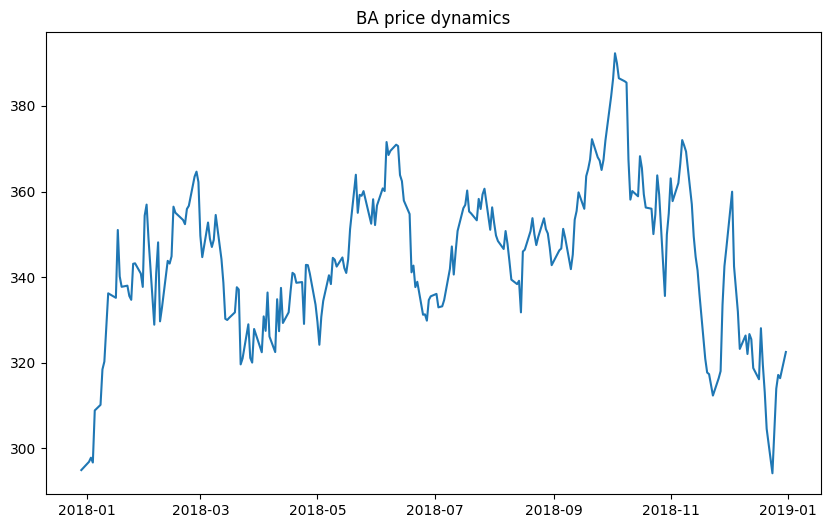

In [96]:
plt.figure(figsize=(10,6))
_=plt.plot(prices.BA)
_=plt.title('BA price dynamics')

### Визуализация динамики дневных котировок акций **Johnson & Johnson**

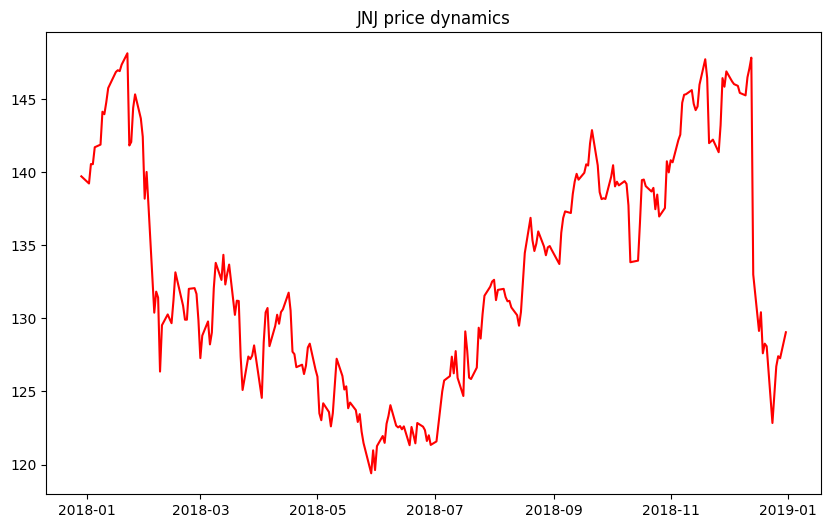

In [103]:
plt.figure(figsize=(10,6))
_=plt.plot(prices.JNJ,color='red')
_=plt.title('JNJ price dynamics')

### Визуализация кумулятивной доходности компаний сектора Health Care

In [104]:
tickers_energy=list(sample[sample.Sector=='Health Care']['Ticker']) # вспомогательный список тикеров

In [105]:
tickers_energy

['JNJ', 'PFE', 'UNH', 'MRK', 'ABBV', 'AMGN', 'ABT', 'LLY', 'MMM', 'BMY']

In [106]:
returns_cum

,BA,HON,LMT,TMO,CAT,DHR,GD,NOC,ILMN,DE,JNJ,PFE,UNH,MRK,ABBV,AMGN,ABT,LLY,MMM,BMY
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02,1.006544,1.002282,0.992182,1.016326,0.996573,0.995906,0.985451,0.994559,1.025356,1.009584,0.996493,1.006074,1.003175,0.999111,1.017578,1.017826,1.030138,1.002605,1.001147,1.000490
2018-01-03,1.009800,0.994001,1.000498,1.034969,0.998096,1.009157,0.991595,0.999153,1.054144,1.014184,1.006012,1.013528,1.013699,0.997690,1.033502,1.037033,1.032416,1.008051,1.001105,1.001306
2018-01-04,1.005968,1.007433,1.017661,1.047925,1.011804,1.014006,1.008651,1.005344,1.066365,1.019999,1.005940,1.015737,1.018098,1.013862,1.027608,1.032662,1.030664,1.012550,1.014190,1.007670
2018-01-05,1.047235,1.014476,1.026881,1.065884,1.027795,1.020362,1.006144,1.004268,1.044304,1.024344,1.014243,1.017670,1.037512,1.012795,1.045497,1.038815,1.033643,1.024982,1.022093,1.009954
2018-01-08,1.051677,1.008998,1.022146,1.067622,1.053624,1.026180,1.006144,1.004399,1.039224,1.029391,1.015531,1.006350,1.019505,1.006931,1.028746,1.038528,1.030664,1.019773,1.018779,1.010281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,0.997457,0.849254,0.763806,1.097904,0.742163,1.021870,0.728484,0.737122,1.247014,0.877771,0.879187,1.119547,1.056609,1.264439,0.870231,1.025877,1.148765,1.263912,0.758890,0.795692
2018-12-26,1.064494,0.881502,0.783741,1.147936,0.791725,1.076923,0.747948,0.758007,1.342624,0.915405,0.906885,1.164826,1.103828,1.315088,0.920691,1.080276,1.219905,1.315297,0.791350,0.816416
2018-12-27,1.075379,0.895108,0.809189,1.164367,0.803846,1.093514,0.762448,0.780587,1.371001,0.937448,0.911895,1.183048,1.115713,1.339613,0.929687,1.094480,1.237603,1.336609,0.810214,0.822618


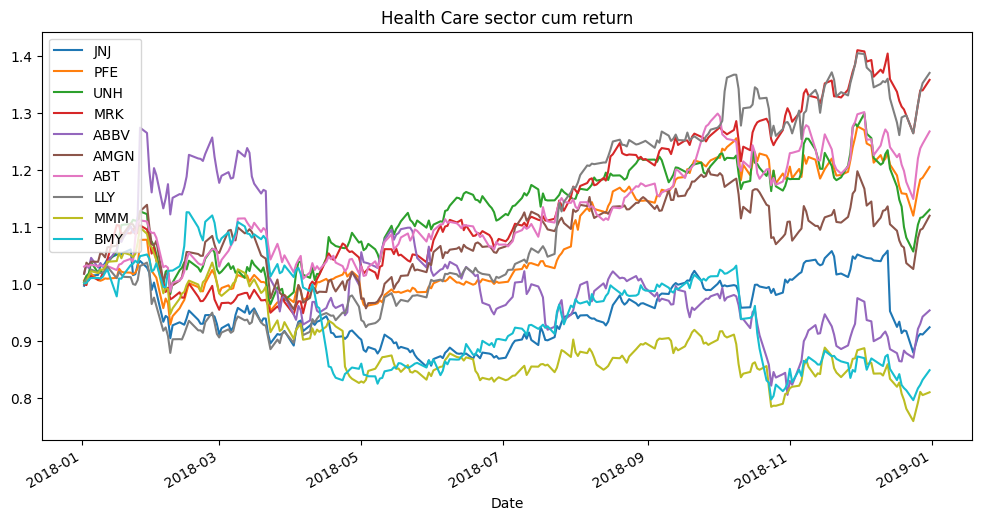

In [107]:
p=returns_cum[tickers_energy].plot(figsize=(12,6),title='Health Care sector cum return')

### Визуализация кумулятивной доходности компаний  сектора *Capital Goods*

In [108]:
tickers_tech=list(sample[sample.Sector=='Capital Goods']['Ticker'])

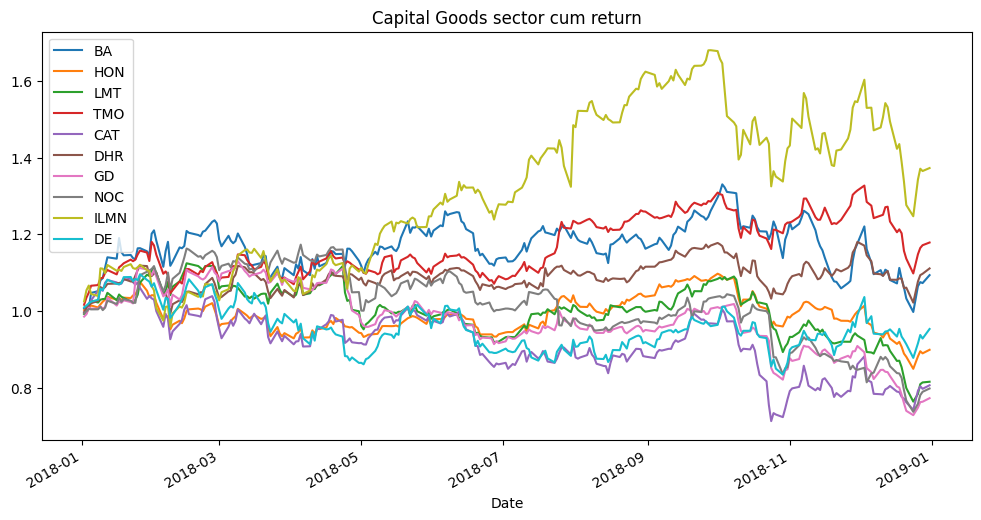

In [109]:
p=returns_cum[tickers_tech].plot(figsize=(12,6),title='Capital Goods sector cum return')

### Инвестиционная привлекательность компаний исходя из фундаментальных показателей

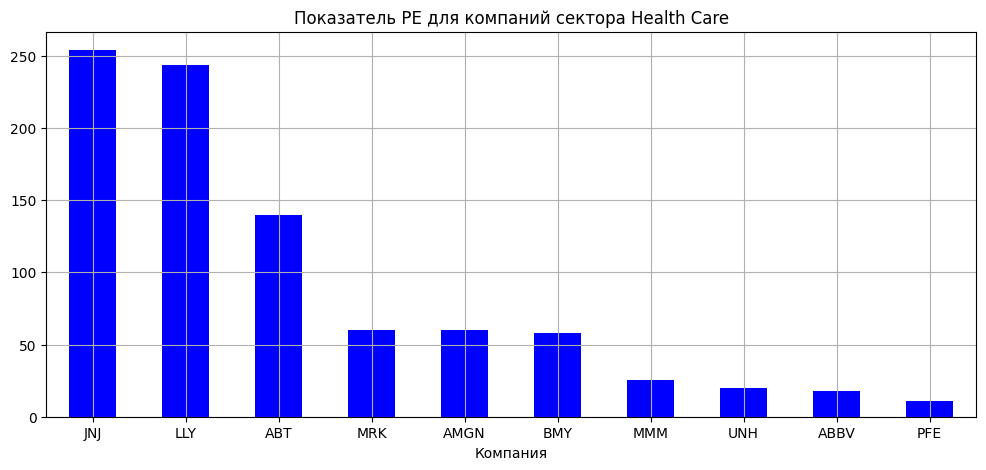

In [132]:
p=sample[(sample.Sector=='Health Care')&(sample.PE>0)].sort_values(by='PE')[::-1].plot(
    x='Ticker',y='PE',kind='bar',
    title=u'Показатель PE для компаний сектора Health Care',
    figsize=(12, 5),
    color=['blue'],
    legend=False,
    grid=True,
    rot=0
)
_=p.set(xlabel=u'Компания')

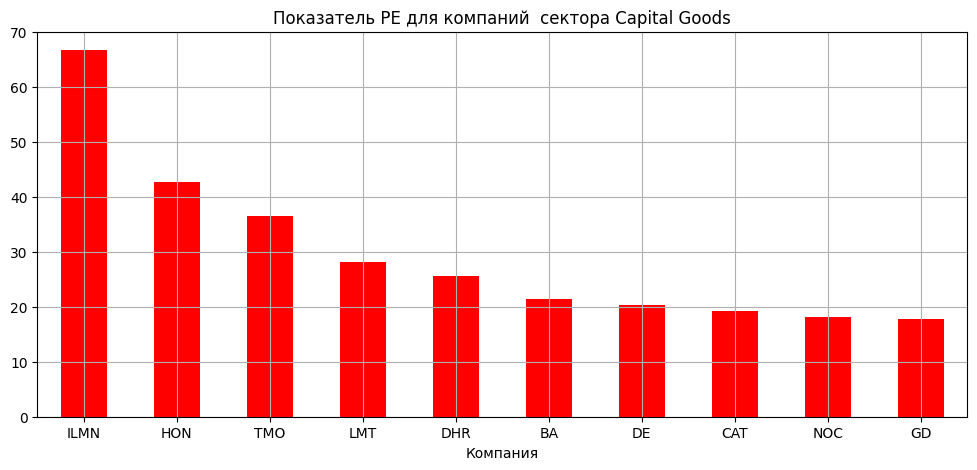

In [133]:
p=sample[(sample.Sector=='Capital Goods')&(sample.PE>0)].sort_values(by='PE')[::-1].plot(
    x='Ticker',y='PE',kind='bar',
    title=u'Показатель PE для компаний  сектора Capital Goods',
    figsize=(12, 5),
    color=['red'],
        legend=False,
    grid=True,
    rot=0
)
_=p.set(xlabel=u'Компания')

### Зависимость между фундаментальными показателями и рыночной доходностью

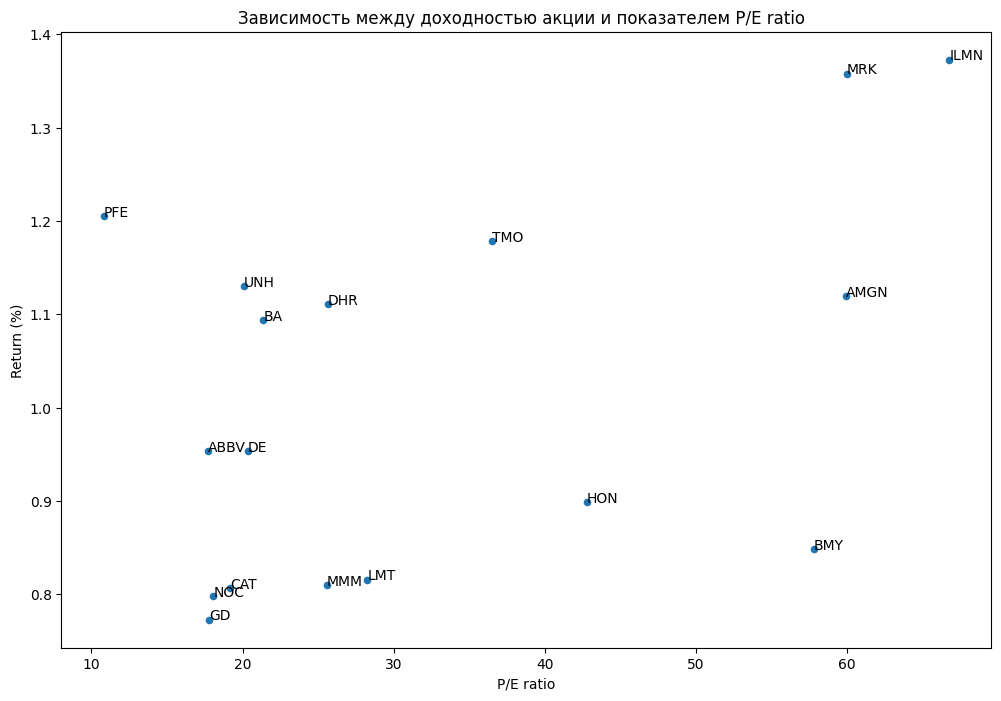

In [136]:
p=sample[(sample.PE>0)&(sample.PE<100)].plot.scatter(
    x='PE',y='Return',
    title=u'Зависимость между доходностью акции и показателем P/E ratio  ',
    figsize=(12,8),
    )

_=p.set(xlabel='P/E ratio',ylabel='Return (%)')

for  i, point in sample[(sample.PE>0)&(sample.PE<100)].iterrows():
    p.text(point['PE'], point['Return'], str(point['Ticker']))

### График скользящих средних для компании **Boeing**

In [139]:
window_1=12
window_2=26

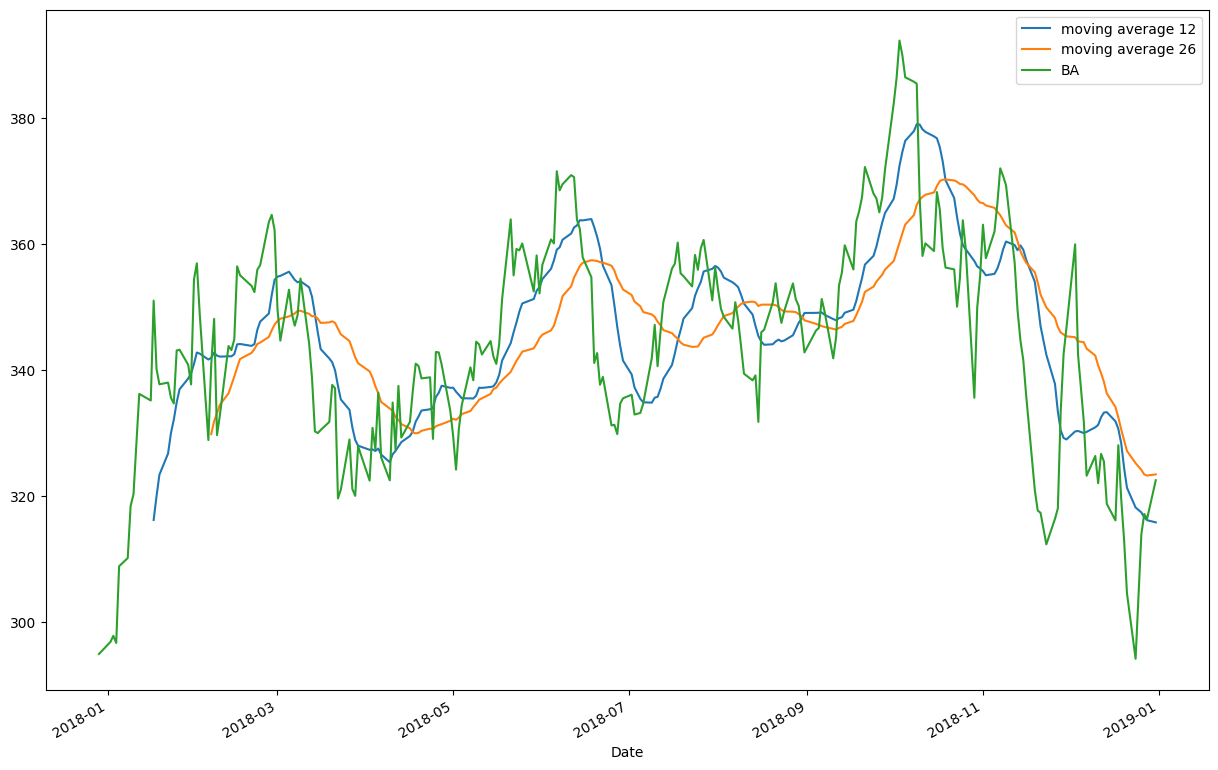

In [138]:
plt.figure(figsize=(15,10))
_=prices['BA'].rolling(window_1).mean().plot(label='moving average '+str(window_1))
_=prices['BA'].rolling(window_2).mean().plot(label='moving average '+str(window_2))
_=prices['BA'].plot()
_=plt.legend()

### График EWMA и торговые сигналы для компании **Boeing**

In [141]:
df_ewm = pd.DataFrame(
    zip(prices['BA'].ewm(span=12).mean(), prices['BA'].ewm(span=26).mean()),
    columns=['EWMA_12', 'EWMA_26'],
)
# вспомогательный массив для EWMA


In [142]:
# зоны покупки и продажи
df_ewm['Buy'] = np.where( (df_ewm['EWMA_12']> df_ewm['EWMA_26']), 1, 0)
df_ewm['Sell'] = np.where( (df_ewm['EWMA_12']< df_ewm['EWMA_26']), 1, 0)

In [143]:
# сигналы покупки и продажи
df_ewm['Buy_ind'] = np.where( (df_ewm['Buy'] > df_ewm['Buy'].shift(1)),1,0)
df_ewm['Sell_ind'] = np.where( (df_ewm['Sell'] > df_ewm['Sell'].shift(1)),1,0)

In [144]:
df_ewm.index=prices.index

In [145]:
df_ewm['Price']=prices['BA']

In [146]:
df_ewm.head()

,EWMA_12,EWMA_26,Buy,Sell,Buy_ind,Sell_ind,Price
Date,,,,,,,
2017-12-29,294.910004,294.910004,0,0,0,0,294.910004
2018-01-02,295.955416,295.912115,1,0,1,0,296.839996
2018-01-03,296.675353,296.590410,1,0,0,0,297.799988
2018-01-04,296.673668,296.612663,1,0,0,0,296.670013
2018-01-05,299.979216,299.448232,1,0,0,0,308.839996


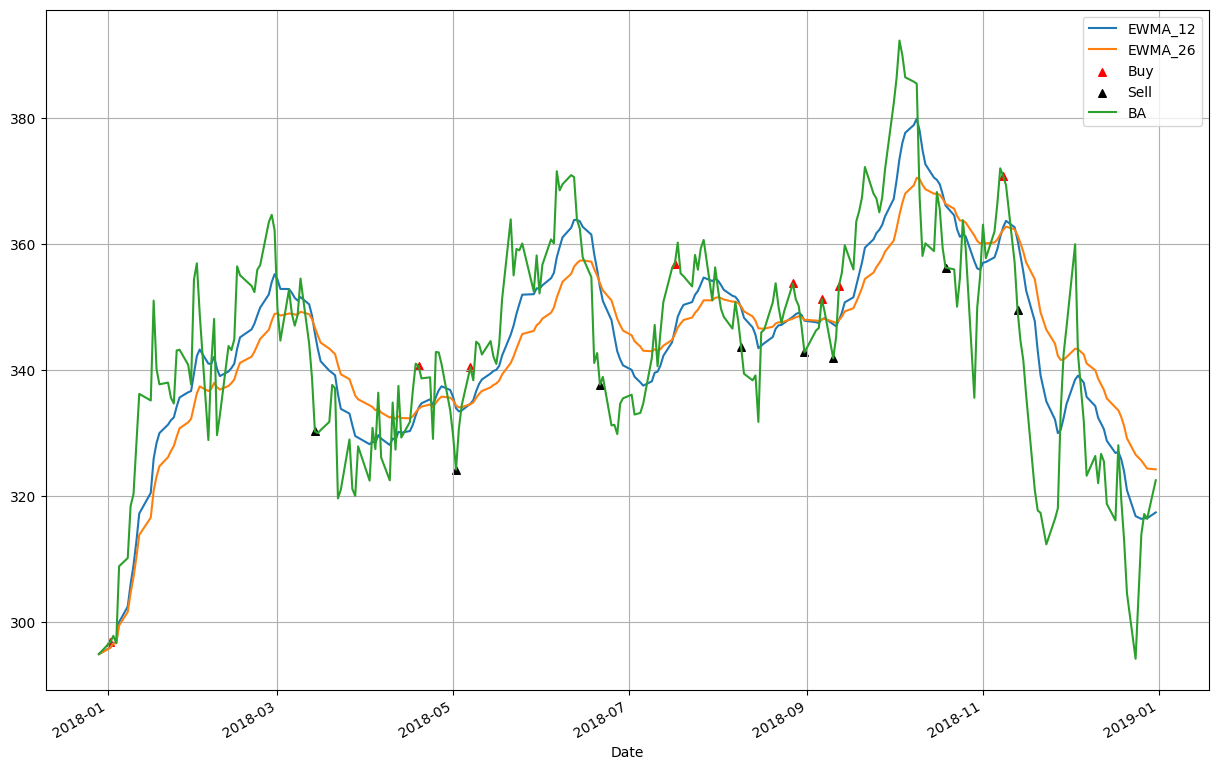

In [149]:
plt.figure(figsize=(15, 10))
_ = prices['BA'].ewm(span=window_1).mean().plot(label='EWMA_' + str(window_1))
_ = prices['BA'].ewm(span=window_2).mean().plot(label='EWMA_' + str(window_2))
_ = plt.scatter(
                df_ewm[df_ewm['Buy_ind'] == 1].index,
                df_ewm[df_ewm['Buy_ind'] == 1]['Price'],
                label='Buy',
                color='red',
                s=30,
                marker="^"
            )
_ = plt.scatter(
                df_ewm[df_ewm['Sell_ind'] == 1].index,
                df_ewm[df_ewm['Sell_ind'] == 1]['Price'],
                label='Sell',
                color='black',
                s=30,
                marker="^"
            )
_ = prices['BA'].plot()
_ = plt.legend()
_ = plt.grid()


# Выводы:

1. Из прилагаемого файла было выбрано по 20 компаний из двух секторов (Health Care и Capital Goods), по 10 из каждого. 
2. Для выбранных были загружен дневные котировки с сервера Yahoo Finance за 2018 г. (данные сохранены в отдельном файле).
3. Рассчитаны доходности по акциям выбранных компаний для разных периодов.
4. Проведён графический и первичный статистический анализ фундаментальных и рыночных показателей по выбранным компаниям по аналогии с разобранными примерами.